In [ ]:
!pip install mlbox

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [2]:
paths = ["/content/drive/MyDrive/3 AutoML/WA_Fn-UseC_-Telco-Customer-Churntrain.csv", "/content/drive/MyDrive/3 AutoML/WA_Fn-UseC_-Telco-Customer-Churntest.csv"]
target_name = "Churn"

In [3]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : WA_Fn-UseC_-Telco-Customer-Churntrain.csv ...
cleaning data ...
CPU time: 7.2253334522247314 seconds

reading csv : WA_Fn-UseC_-Telco-Customer-Churntest.csv ...
cleaning data ...
CPU time: 0.3032398223876953 seconds

> Number of common features : 20

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 17
> Number of numerical features: 3
> Number of training samples : 5634
> Number of test samples : 1409

> You have no missing values on train set...

> Task : classification
No     4138
Yes    1496
Name: Churn, dtype: int64

encoding target ...


In [4]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts ...
CPU time: 1.7122418880462646 seconds

> Top 10 drifts

('customerID', 0.9994675186368478)
('TotalCharges', 0.9042296345476148)
('tenure', 0.04251805750386728)
('gender', 0.038327208596054874)
('OnlineBackup', 0.027314840563430032)
('DeviceProtection', 0.02591524525727662)
('InternetService', 0.019519994457753764)
('PaymentMethod', 0.018293992739348397)
('MultipleLines', 0.017815081727821314)
('Contract', 0.01400154659057451)

> Deleted variables : ['TotalCharges', 'customerID']
> Drift coefficients dumped into directory : save


Tuning

In [5]:
opt = Optimiser(scoring = 'accuracy', n_folds = 3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [6]:
%%time
best = opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 0.7754703585374512
VARIANCE : 0.0065983778116581815 (fold 1 = 0.7827476038338658, fold 2 = 0.7667731629392971, fold 3 = 0.7768903088391906)
CPU time: 22.885898

In [7]:
%%time
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.12485174744331443}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : accuracy = 0.7793752218672346
VARIANCE : 0.0058707260946188325 (fold 1 = 0.7864749733759319, fold 2 = 0.77209797657082, fold 3 = 0.7795527156549521)
CPU tim


fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU time: 0.7623131275177002 seconds


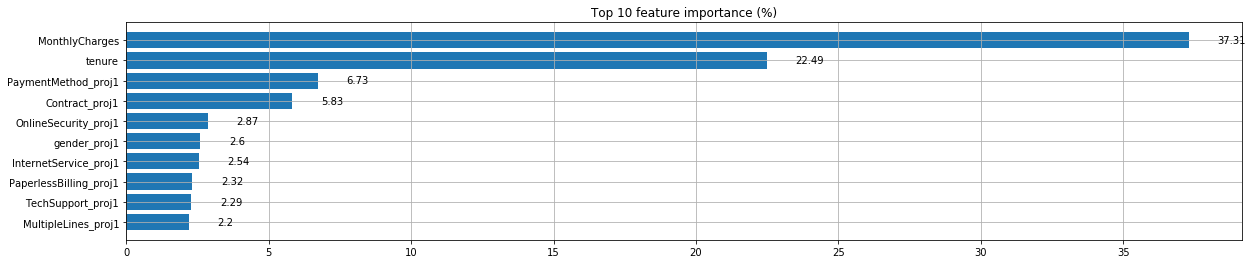


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.07032656669616699 seconds

> Overview on predictions : 

         No       Yes Churn_predicted
0  0.253590  0.746410             Yes
1  0.928297  0.071703              No
2  0.996469  0.003531              No
3  0.109844  0.890156             Yes
4  0.991794  0.008206              No
5  0.779013  0.220987              No
6  0.959620  0.040380              No
7  0.998665  0.001335              No
8  0.760679  0.239321              No
9  0.726539  0.273461              No

dumping predictions into directory : save ...


In [8]:
prd = Predictor()
prd.fit_predict(best, df)

In [9]:
best

{'ce__strategy': 'random_projection',
 'est__max_depth': 3,
 'fs__threshold': 0.27971842232112126,
 'ne__numerical_strategy': 0}